In [1]:
## Importing Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder 
import joblib 

In [2]:
## Loading Data

file_path = r"C:\Users\Piyush\OneDrive\Desktop\All\Portfolio Projects\Churn Analysis\Data\Prediction_Data.xlsx"
sheet_name = 'Churn_Data'
df=pd.read_excel(file_path, sheet_name=sheet_name)


In [3]:
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.599998,593.299988,0.000000,0,381.510010,974.809998,Stayed,NaN,NaN
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.000000,542.400024,38.330002,10,96.209999,610.280029,Stayed,NaN,NaN
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.900002,280.850006,0.000000,0,134.600006,415.450012,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.000000,1237.849976,0.000000,0,361.660004,1599.510010,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.900002,267.399994,0.000000,0,22.139999,289.540009,Churned,Dissatisfaction,Network reliability


Data Preprocessing 

In [6]:
# Drop columns that won't be used for prediction
#df=df.drop(['Customer_ID','Churn_Reason','Churn_Category'],axis= 1)

In [9]:
# List of columns to be label encoded

Encode_Columns = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

label_encoders = {}
for column in Encode_Columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

df['Customer_Status'] = df['Customer_Status'].map({'Stayed': 0, 'Churned': 1})


In [12]:
## Spliting Data into features and target 

X=df.drop('Customer_Status',axis=1)
y=df['Customer_Status']

In [15]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train Random Forest Model 

In [16]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluate Model 

Confusion Matrix:
[[3208  226]
 [ 508  863]]

Classification Report:
[[3208  226]
 [ 508  863]]


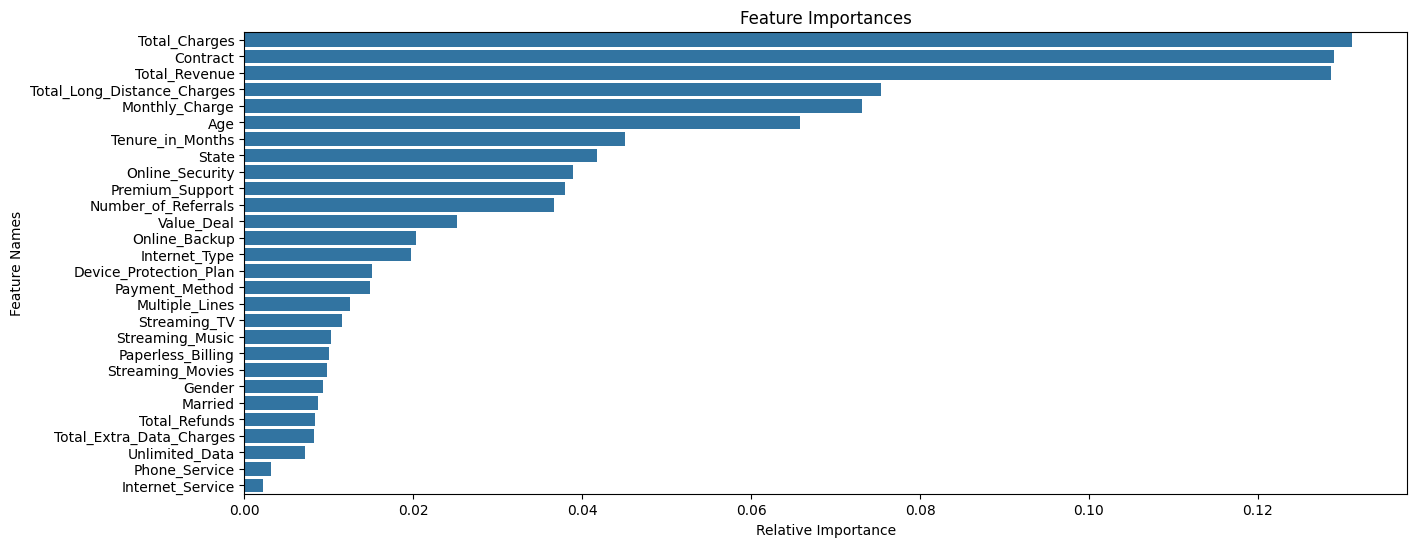

In [20]:
# Making predictions
y_pred = rf_model.predict(X_test)

#Evaluating model 
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
# print("\nClassification Report:")
# print(confusion_matrix(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

Using Model for prediction on new joined Data

In [21]:
file_path = r"C:\Users\Piyush\OneDrive\Desktop\All\Portfolio Projects\Churn Analysis\Data\Prediction_Data.xlsx"
sheet_name = 'Joined_Data'

new_df = pd.read_excel(file_path,sheet_name=sheet_name)

In [22]:
new_df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,Bank Withdrawal,72.099998,72.099998,0.0,0,7.770000,79.870003,Joined,NaN,NaN
1,57256-BIH,Female,18,No,Bihar,9,7,NaN,Yes,No,...,Credit Card,19.850000,57.200001,0.0,0,9.360000,66.559998,Joined,NaN,NaN
2,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,Credit Card,44.299999,44.299999,0.0,0,42.950001,87.250000,Joined,NaN,NaN
3,66612-KAR,Female,58,Yes,Karnataka,11,18,NaN,Yes,No,...,Credit Card,19.950001,58.000000,0.0,0,8.070000,66.070000,Joined,NaN,NaN
4,22119-WES,Male,31,Yes,West Bengal,5,5,NaN,Yes,No,...,Credit Card,20.049999,33.700001,0.0,0,3.620000,37.320000,Joined,NaN,NaN


In [23]:
# Retain the original DataFrame to preserve unencoded columns
og_data = new_df.copy()

# Retain the Customer_ID column
customer_ids = new_df['Customer_ID']


In [24]:
# Drop columns that won't be used for prediction in the encoded DataFrame
new_df = new_df.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_df.select_dtypes(include=['object']).columns:
    new_df[column] = label_encoders[column].transform(new_df[column])


In [25]:
# Make predictions
new_predictions = rf_model.predict(new_df)

# Add predictions to the original DataFrame
og_data['Customer_Status_Predicted']= new_predictions

In [26]:
og_data

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Customer_Status_Predicted
0,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,72.099998,72.099998,0.0,0,7.770000,79.870003,Joined,NaN,NaN,1
1,57256-BIH,Female,18,No,Bihar,9,7,NaN,Yes,No,...,19.850000,57.200001,0.0,0,9.360000,66.559998,Joined,NaN,NaN,1
2,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,44.299999,44.299999,0.0,0,42.950001,87.250000,Joined,NaN,NaN,1
3,66612-KAR,Female,58,Yes,Karnataka,11,18,NaN,Yes,No,...,19.950001,58.000000,0.0,0,8.070000,66.070000,Joined,NaN,NaN,1
4,22119-WES,Male,31,Yes,West Bengal,5,5,NaN,Yes,No,...,20.049999,33.700001,0.0,0,3.620000,37.320000,Joined,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,31412-HAR,Female,81,Yes,Haryana,14,29,NaN,Yes,No,...,19.200001,37.200001,0.0,0,14.060000,51.259998,Joined,NaN,NaN,1
407,54997-UTT,Female,55,No,Uttar Pradesh,7,23,NaN,Yes,No,...,44.000000,44.000000,0.0,0,26.150000,70.150002,Joined,NaN,NaN,1
408,56728-RAJ,Male,40,No,Rajasthan,0,1,NaN,Yes,No,...,45.599998,45.599998,0.0,0,37.439999,83.040001,Joined,NaN,NaN,1
409,47624-TAM,Female,62,Yes,Tamil Nadu,7,29,NaN,Yes,No,...,-5.000000,189.100006,0.0,0,100.589996,289.690002,Joined,NaN,NaN,1


In [27]:
# Filter the DataFrame to include only records predicted as "Churned"
og_data = og_data[og_data['Customer_Status_Predicted'] == 1]


In [28]:
og_data

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Customer_Status_Predicted
0,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,72.099998,72.099998,0.0,0,7.770000,79.870003,Joined,NaN,NaN,1
1,57256-BIH,Female,18,No,Bihar,9,7,NaN,Yes,No,...,19.850000,57.200001,0.0,0,9.360000,66.559998,Joined,NaN,NaN,1
2,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,44.299999,44.299999,0.0,0,42.950001,87.250000,Joined,NaN,NaN,1
3,66612-KAR,Female,58,Yes,Karnataka,11,18,NaN,Yes,No,...,19.950001,58.000000,0.0,0,8.070000,66.070000,Joined,NaN,NaN,1
4,22119-WES,Male,31,Yes,West Bengal,5,5,NaN,Yes,No,...,20.049999,33.700001,0.0,0,3.620000,37.320000,Joined,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,21065-HAR,Male,27,No,Haryana,5,10,NaN,Yes,No,...,20.299999,20.299999,0.0,0,10.840000,31.139999,Joined,NaN,NaN,1
406,31412-HAR,Female,81,Yes,Haryana,14,29,NaN,Yes,No,...,19.200001,37.200001,0.0,0,14.060000,51.259998,Joined,NaN,NaN,1
407,54997-UTT,Female,55,No,Uttar Pradesh,7,23,NaN,Yes,No,...,44.000000,44.000000,0.0,0,26.150000,70.150002,Joined,NaN,NaN,1
408,56728-RAJ,Male,40,No,Rajasthan,0,1,NaN,Yes,No,...,45.599998,45.599998,0.0,0,37.439999,83.040001,Joined,NaN,NaN,1


In [30]:
# Save the results
og_data.to_csv(r"C:\Users\Piyush\OneDrive\Desktop\All\Portfolio Projects\Churn Analysis\Data\Predictions.csv", index=False)
